In [159]:
import pandas as pd

# Load the CSV
df = pd.read_csv("telco_churn.csv")

# Show first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [160]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [161]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [162]:
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [163]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

df['gender'] = df['gender'].map({'Female':0, 'Male':1})
multi_cat_cols = ['InternetService','Contract','PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols)



In [164]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

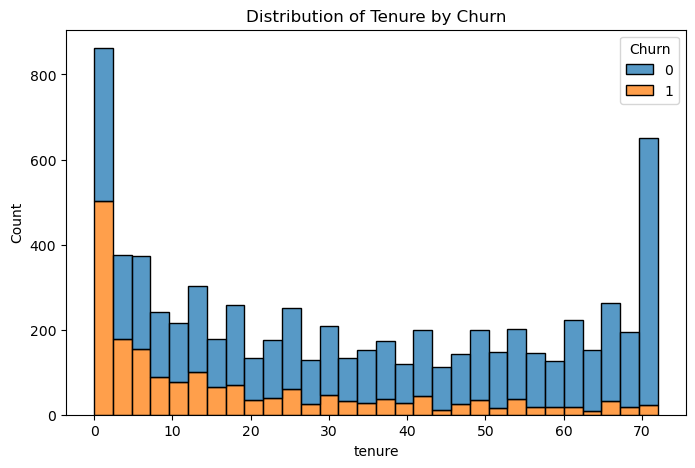

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Distribution of Tenure by Churn")
plt.show()


In [166]:

print(X.dtypes)


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
Contract_Month-to-month                       bool
Contract_One year                             bool
Contract_Two year                             bool
PaymentMethod_Bank transfer (automatic)       bool
PaymentMethod_Credit card (automatic)         bool
PaymentMethod_Electronic check                bool
PaymentMethod_Mailed check                    bool
MultipleLines_No               

In [167]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [168]:
multi_cat_cols_2 = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df = pd.get_dummies(df, columns=multi_cat_cols_2)


In [169]:
df = df.drop('customerID', axis=1, errors='ignore')


In [170]:
df.isna().sum()
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Check again
print(df.isnull().sum())



gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLi

In [171]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X.isna().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
OnlineSecu

In [172]:
print(X['gender'].unique())
print(X['gender'].isna().sum())


[0 1]
0


In [173]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Predict on the test set
y_pred = model.predict(X_test_scaled)

# Step 2: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 4: Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Accuracy: 0.7867803837953091
Confusion Matrix:
 [[914 119]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [176]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(4130), np.int64(1): np.int64(1495)}


In [177]:
from sklearn.linear_model import LogisticRegression

# Initialize model with balanced class weight
model_balanced = LogisticRegression(max_iter=1000, class_weight="balanced")

# Train the model
model_balanced.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_balanced = model_balanced.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_balanced)
cm = confusion_matrix(y_test, y_pred_balanced)
cr = classification_report(y_test, y_pred_balanced)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Accuracy: 0.7313432835820896
Confusion Matrix:
 [[733 300]
 [ 78 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [178]:
# Get feature names
feature_names = X_train.columns

# Get model coefficients
coefficients = model_balanced.coef_[0]

# Combine into a DataFrame for easier viewing
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute impact
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Show top 10 important features
feature_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
4,tenure,-1.354317,1.354317
7,MonthlyCharges,-0.928556,0.928556
8,TotalCharges,0.657610,0.657610
10,InternetService_Fiber optic,0.412672,0.412672
9,InternetService_DSL,-0.329748,0.329748
12,Contract_Month-to-month,0.327804,0.327804
14,Contract_Two year,-0.325231,0.325231
39,StreamingMovies_Yes,0.185622,0.185622
36,StreamingTV_Yes,0.183565,0.183565
6,PaperlessBilling,0.120651,0.120651


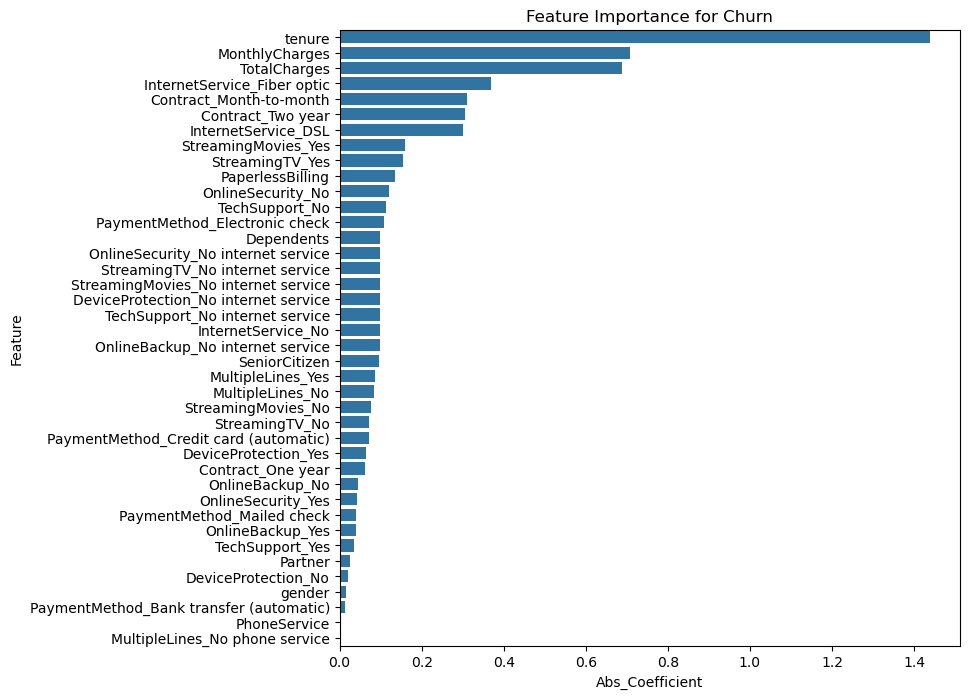

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame of features and their absolute coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Abs_Coefficient': abs(model.coef_[0])
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(8,8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance for Churn')
plt.show()
